In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

file_path = 'data/dataset_mood_smartphone.csv'

df = pd.read_csv(file_path, parse_dates=['time'], index_col=False)

print(df)


        Unnamed: 0       id                    time        variable   value
0                1  AS14.01 2014-02-26 13:00:00.000            mood   6.000
1                2  AS14.01 2014-02-26 15:00:00.000            mood   6.000
2                3  AS14.01 2014-02-26 18:00:00.000            mood   6.000
3                4  AS14.01 2014-02-26 21:00:00.000            mood   7.000
4                5  AS14.01 2014-02-27 09:00:00.000            mood   6.000
...            ...      ...                     ...             ...     ...
376907     2770399  AS14.30 2014-04-11 07:51:16.948  appCat.weather   8.032
376908     2772465  AS14.30 2014-04-19 11:00:32.747  appCat.weather   3.008
376909     2774026  AS14.30 2014-04-26 10:19:07.434  appCat.weather   7.026
376910     2774133  AS14.30 2014-04-27 00:44:48.450  appCat.weather  23.033
376911     2784435  AS14.32 2014-04-07 18:25:14.036  appCat.weather  22.431

[376912 rows x 5 columns]


In [42]:
# clean data by dropping NA values

cleaned_data = df[df['value'] != 'NA'].dropna()

# TODO: remove outliers for each variable and write in report why/how

print(cleaned_data)

        Unnamed: 0       id                    time        variable   value
0                1  AS14.01 2014-02-26 13:00:00.000            mood   6.000
1                2  AS14.01 2014-02-26 15:00:00.000            mood   6.000
2                3  AS14.01 2014-02-26 18:00:00.000            mood   6.000
3                4  AS14.01 2014-02-26 21:00:00.000            mood   7.000
4                5  AS14.01 2014-02-27 09:00:00.000            mood   6.000
...            ...      ...                     ...             ...     ...
376907     2770399  AS14.30 2014-04-11 07:51:16.948  appCat.weather   8.032
376908     2772465  AS14.30 2014-04-19 11:00:32.747  appCat.weather   3.008
376909     2774026  AS14.30 2014-04-26 10:19:07.434  appCat.weather   7.026
376910     2774133  AS14.30 2014-04-27 00:44:48.450  appCat.weather  23.033
376911     2784435  AS14.32 2014-04-07 18:25:14.036  appCat.weather  22.431

[376710 rows x 5 columns]


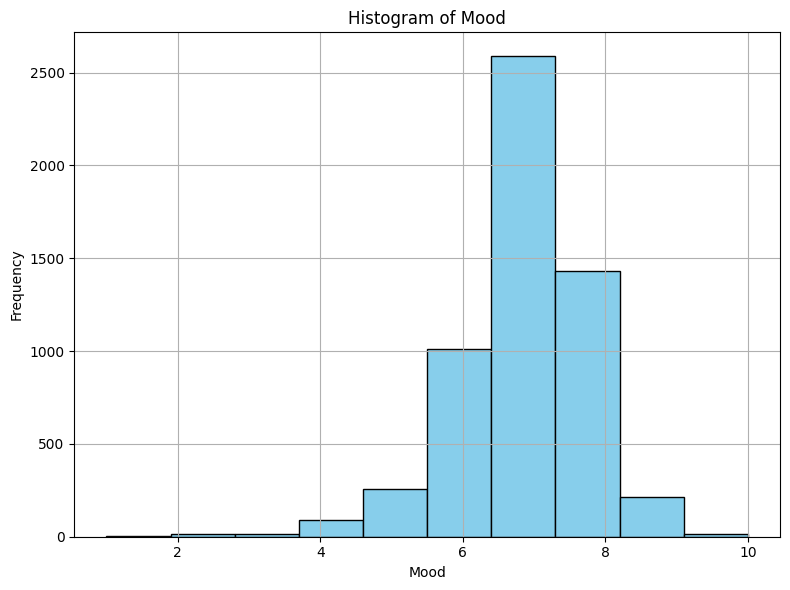

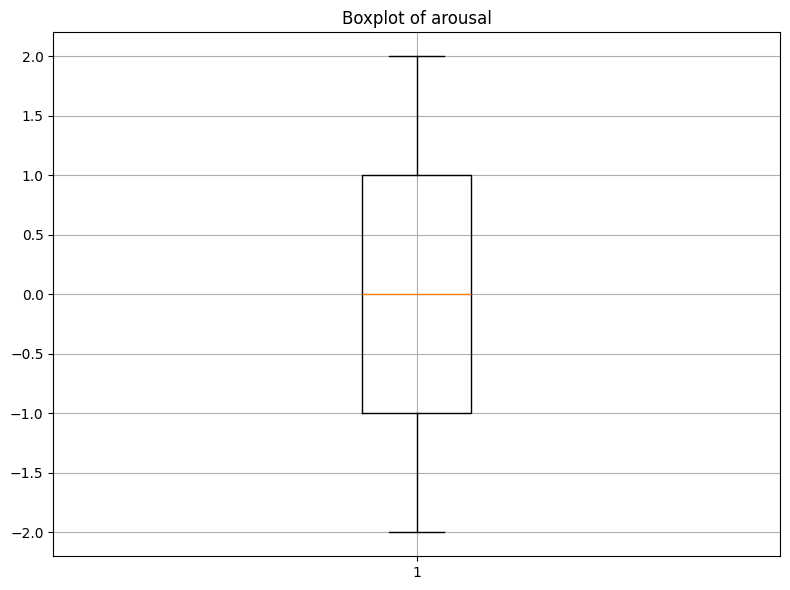

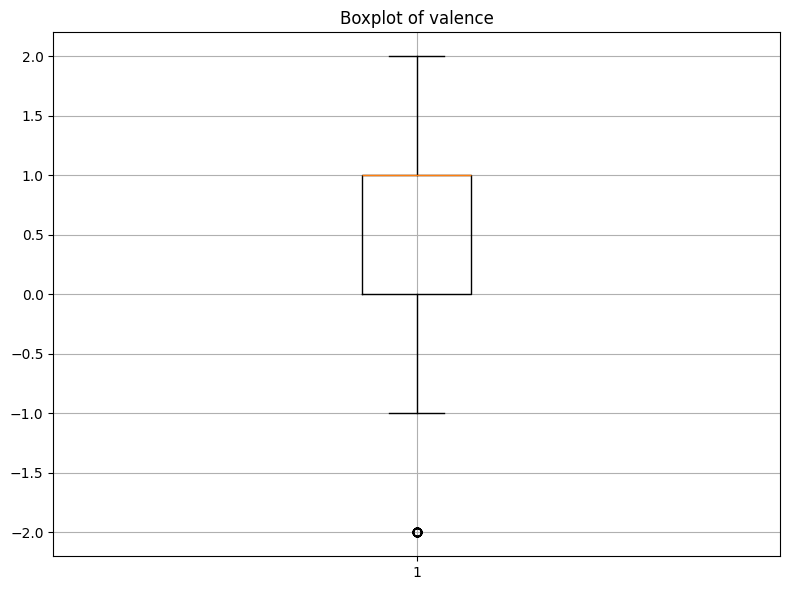

/tmp/ipykernel_1838/4117968482.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(group[cleaned_data['variable'] == 'mood']['time'], group[cleaned_data['variable'] == 'mood']['value'], label=name, linewidth=1)
/tmp/ipykernel_1838/4117968482.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(group[cleaned_data['variable'] == 'mood']['time'], group[cleaned_data['variable'] == 'mood']['value'], label=name, linewidth=1)
/tmp/ipykernel_1838/4117968482.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(group[cleaned_data['variable'] == 'mood']['time'], group[cleaned_data['variable'] == 'mood']['value'], label=name, linewidth=1)
/tmp/ipykernel_1838/4117968482.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(group[cleaned_data['variable'] == 'mood']['time'], group[cleaned_data['variable'] == 'mood']['value'], label=name, l

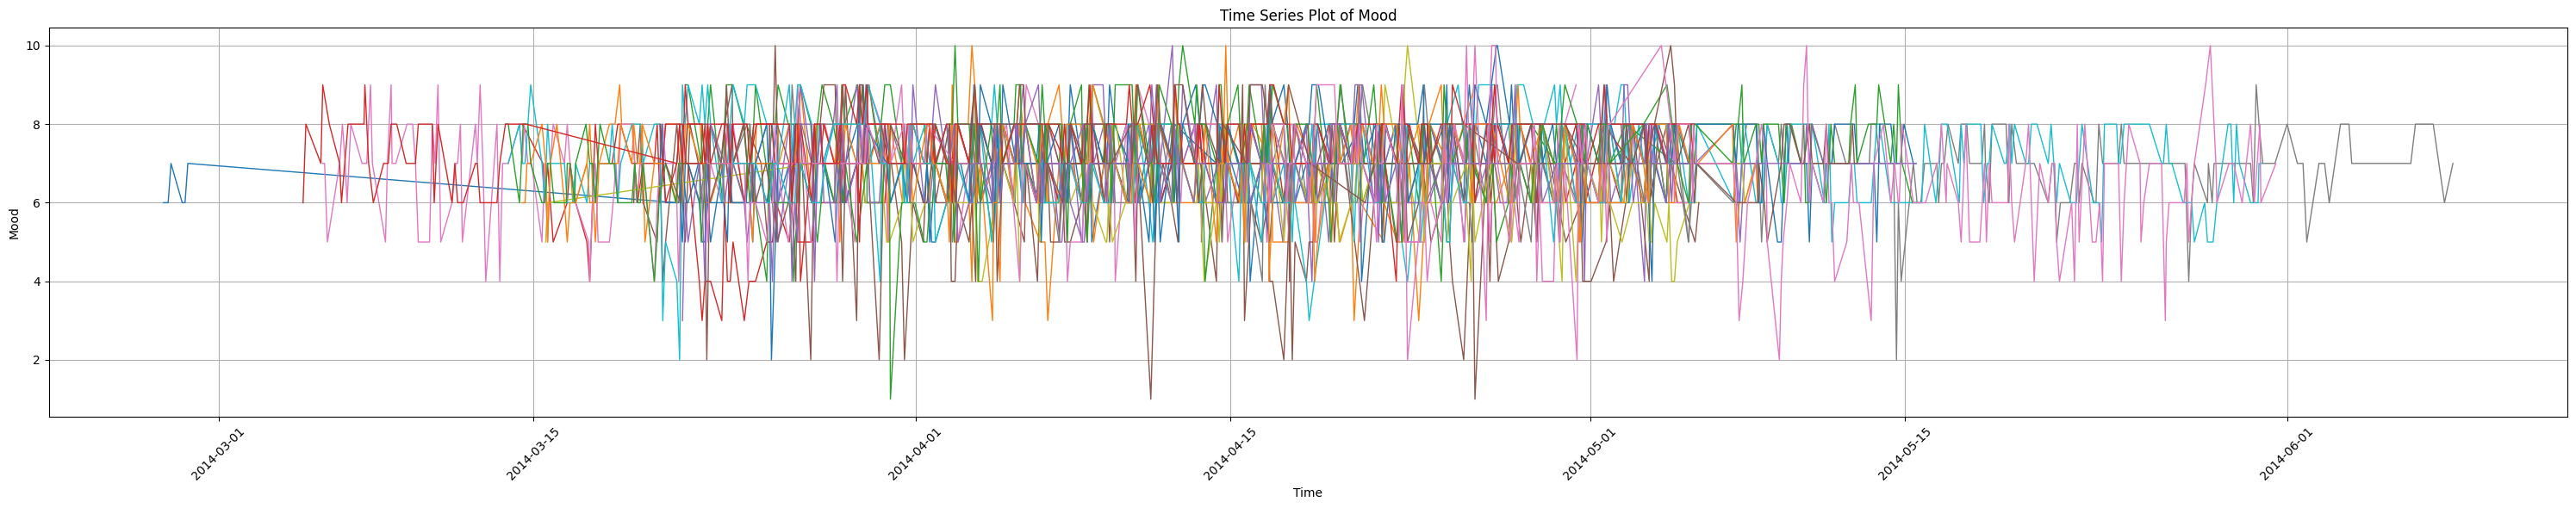

/tmp/ipykernel_1838/4117968482.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(group[cleaned_data['variable'] == 'activity']['time'], group[cleaned_data['variable'] == 'activity']['value'], label=name, linewidth=1)
/tmp/ipykernel_1838/4117968482.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(group[cleaned_data['variable'] == 'activity']['time'], group[cleaned_data['variable'] == 'activity']['value'], label=name, linewidth=1)
/tmp/ipykernel_1838/4117968482.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(group[cleaned_data['variable'] == 'activity']['time'], group[cleaned_data['variable'] == 'activity']['value'], label=name, linewidth=1)
/tmp/ipykernel_1838/4117968482.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(group[cleaned_data['variable'] == 'activity']['time'], group[cleaned_data['variable'] == 'ac

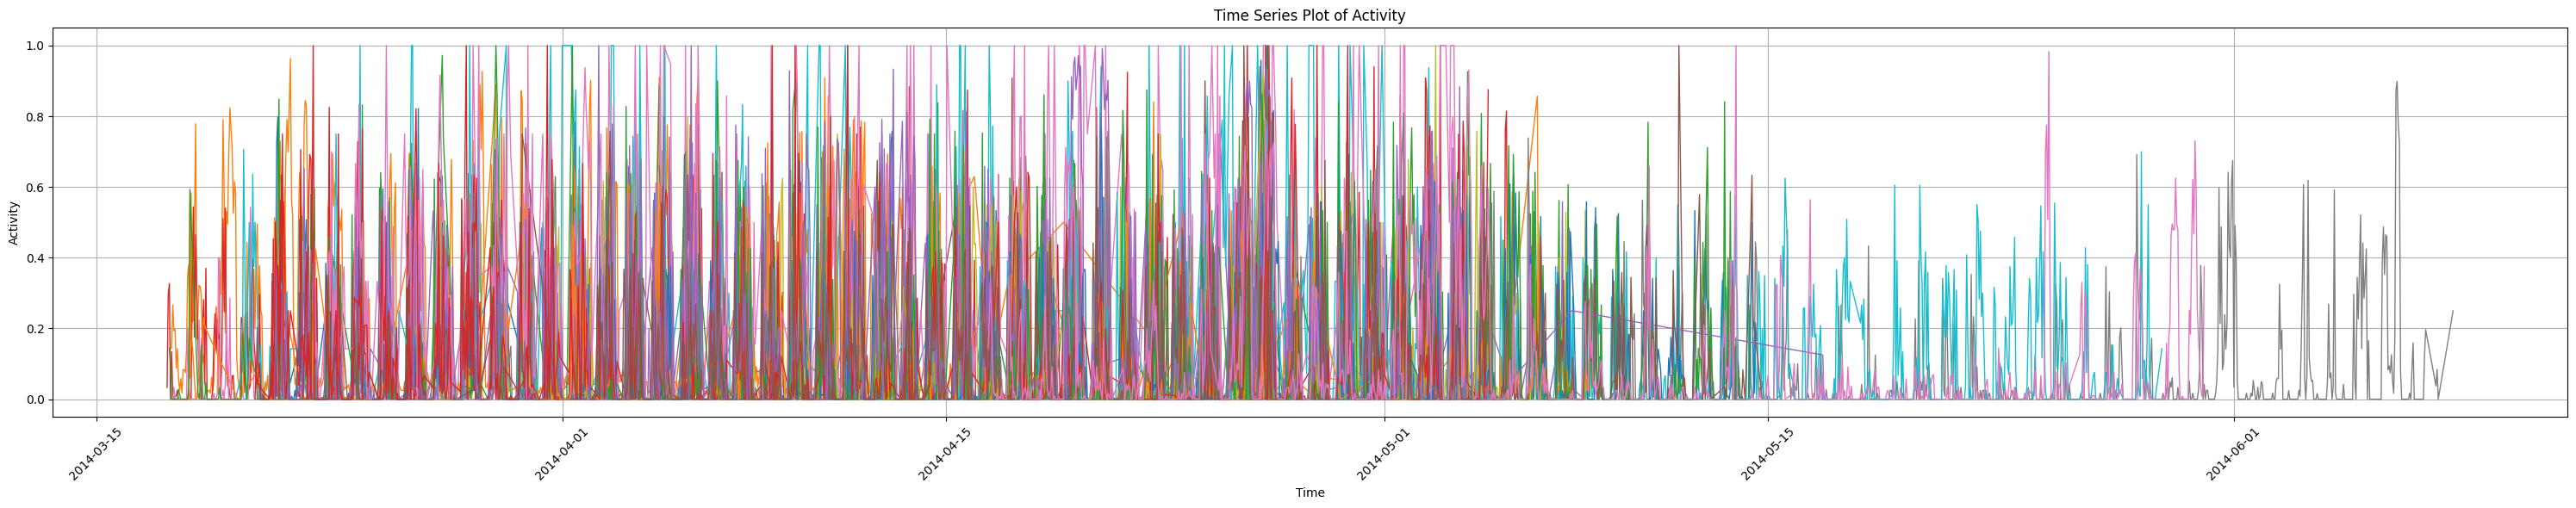

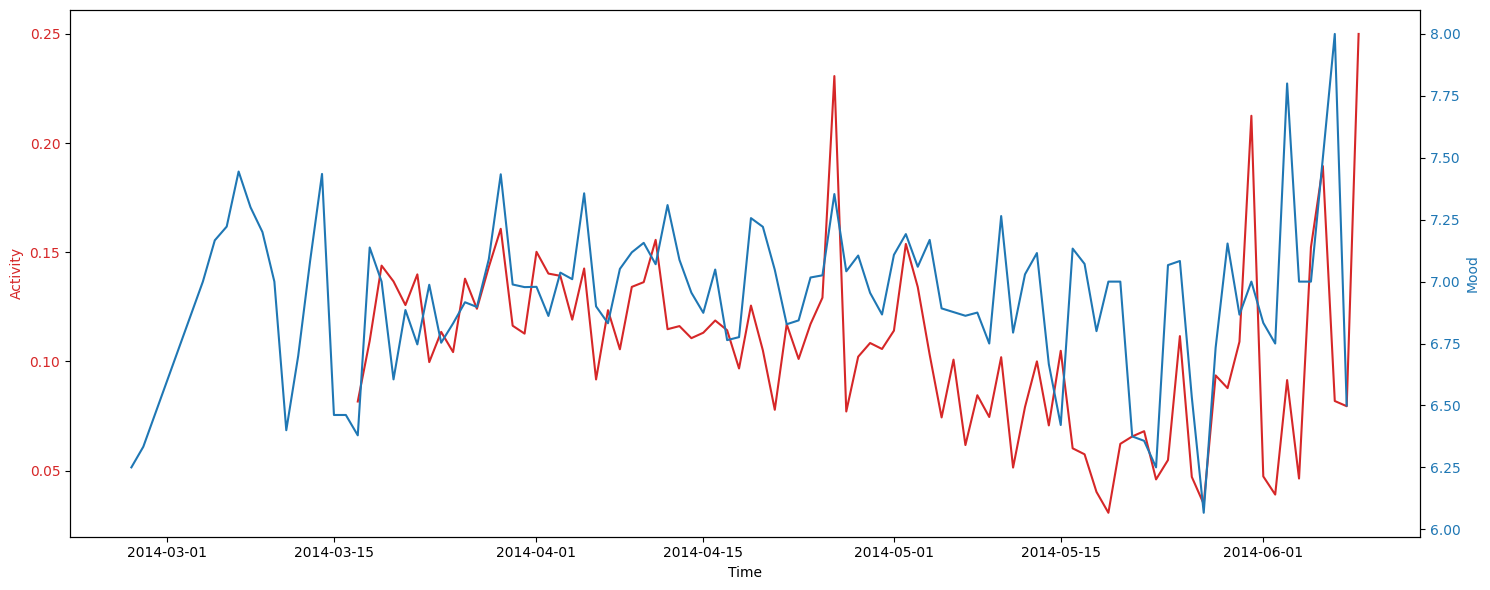

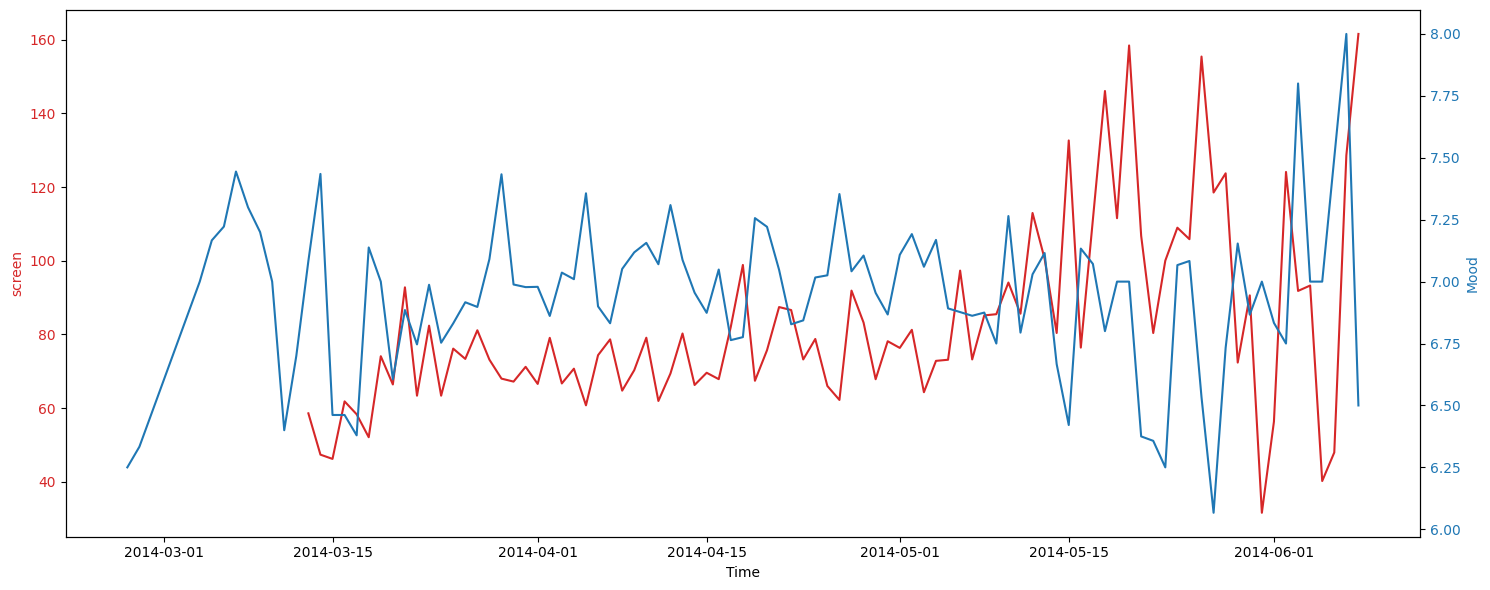

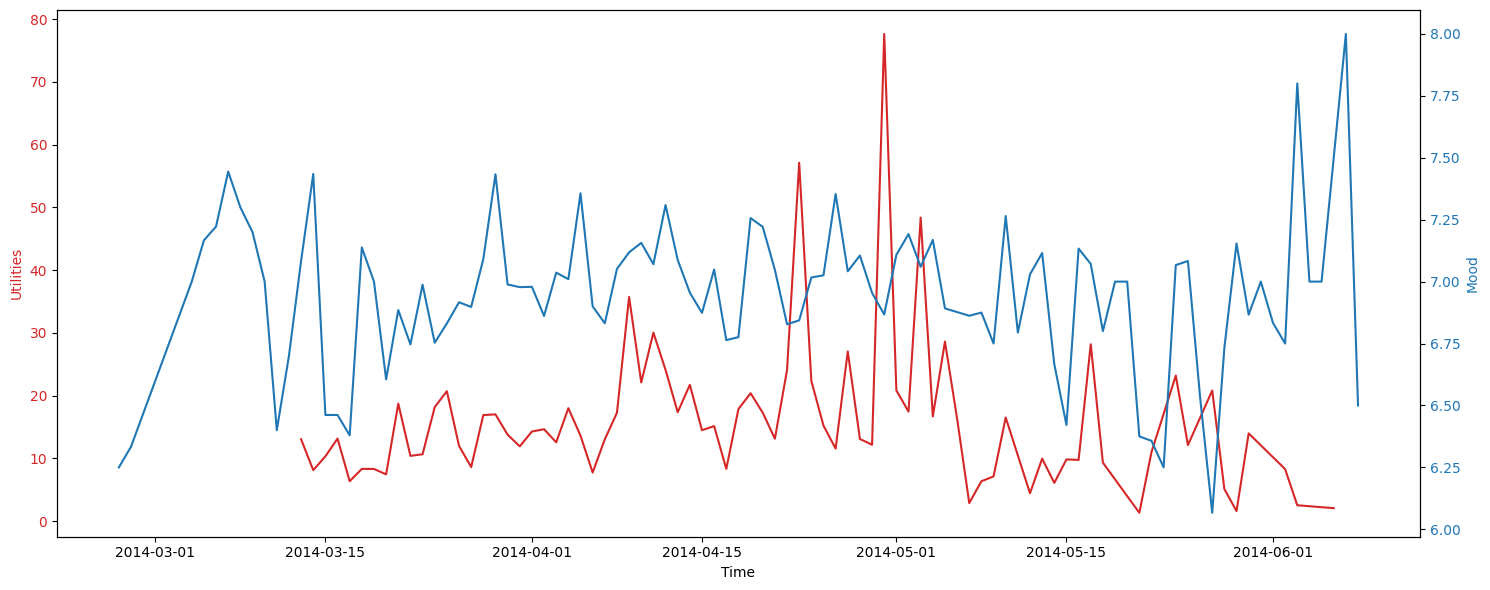

In [73]:
# Histogram of mood 
plt.figure(figsize=(8, 6))
plt.hist(cleaned_data[cleaned_data['variable'] == 'mood']['value'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Mood')
plt.xlabel('Mood')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


# Boxplot of arousal 
plt.figure(figsize=(8, 6))
plt.boxplot(cleaned_data[cleaned_data['variable'] == 'circumplex.arousal']['value'], vert=True)
plt.title('Boxplot of arousal')
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot of valence 
plt.figure(figsize=(8, 6))
plt.boxplot(cleaned_data[cleaned_data['variable'] == 'circumplex.valence']['value'], vert=True)
plt.title('Boxplot of valence')
plt.grid(True)
plt.tight_layout()
plt.show()

# Time series plot of mood
# TODO: fix errors and readability of plot
grouped_data = cleaned_data.groupby('id')

# Plot for each 'id'
plt.figure(figsize=(30, 6))
for name, group in grouped_data:
    plt.plot(group[cleaned_data['variable'] == 'mood']['time'], group[cleaned_data['variable'] == 'mood']['value'], label=name, linewidth=1)
    # plt.plot(group['time'], group['value'], label=name, linewidth=1)
    # plt.plot(cleaned_data[cleaned_data['variable'] == 'mood']['time'], cleaned_data[cleaned_data['variable'] == 'mood']['value'], linewidth=1)

plt.title('Time Series Plot of Mood')
plt.xlabel('Time')
plt.ylabel('Mood')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Time series of activity
# TODO: fix errors and readability of plot
grouped_data = cleaned_data.groupby('id')

# Plot for each 'id'
plt.figure(figsize=(30, 6))
for name, group in grouped_data:
    plt.plot(group[cleaned_data['variable'] == 'activity']['time'], group[cleaned_data['variable'] == 'activity']['value'], label=name, linewidth=1)
    # plt.plot(group['time'], group['value'], label=name, linewidth=1)
    # plt.plot(cleaned_data[cleaned_data['variable'] == 'mood']['time'], cleaned_data[cleaned_data['variable'] == 'mood']['value'], linewidth=1)

plt.title('Time Series Plot of Activity')
plt.xlabel('Time')
plt.ylabel('Activity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time series of activity AND mood

avg_activity = cleaned_data[cleaned_data['variable'] == 'activity'].groupby(cleaned_data['time'].dt.date)['value'].mean()
avg_mood = cleaned_data[cleaned_data['variable'] == 'mood'].groupby(cleaned_data['time'].dt.date)['value'].mean()

fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.set_xlabel('Time')
ax1.set_ylabel('Activity', color='tab:red')
ax1.plot(avg_activity.index, avg_activity.values, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx() 
ax2.set_ylabel('Mood', color='tab:blue')
ax2.plot(avg_mood.index, avg_mood.values, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout() 
plt.show()

# Time series of screen AND mood
avg_screen = cleaned_data[cleaned_data['variable'] == 'screen'].groupby(cleaned_data['time'].dt.date)['value'].mean()

fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.set_xlabel('Time')
ax1.set_ylabel('screen', color='tab:red')
ax1.plot(avg_screen.index, avg_screen.values, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx() 
ax2.set_ylabel('Mood', color='tab:blue')
ax2.plot(avg_mood.index, avg_mood.values, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout() 
plt.show()

# Time series of utilities app and mood
avg_ut = cleaned_data[cleaned_data['variable'] == 'appCat.utilities'].groupby(cleaned_data['time'].dt.date)['value'].mean()

fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.set_xlabel('Time')
ax1.set_ylabel('Utilities', color='tab:red')
ax1.plot(avg_ut.index, avg_ut.values, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx() 
ax2.set_ylabel('Mood', color='tab:blue')
ax2.plot(avg_mood.index, avg_mood.values, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout() 
plt.show()

In [74]:
# convert to pandas dataframe
df = pd.DataFrame(cleaned_data, columns=["", "id", "time", "variable", "value"])

groups = df.groupby('variable')['value']

# TODO: fix statisitcal test so we can remove varaibles which are not significant

# Perform statistical tests for each variable
for var, group in groups:
    if var != 'mood':
        if len(group.unique()) > 2: 
            f_statistic, p_value = stats.f_oneway(*[group for name, group in groups])
            if p_value < 0.05:
                print(f"Variable '{var}' is significant (p-value: {p_value:.4f}, f stat: {f_statistic})")
            else:
                print(f"Variable '{var}' is not significant (p-value: {p_value:.4f}, f stat: {f_statistic})")


Variable 'activity' is significant (p-value: 0.0000, f stat: 198.87298566861415)
Variable 'appCat.builtin' is significant (p-value: 0.0000, f stat: 198.87298566861415)
Variable 'appCat.communication' is significant (p-value: 0.0000, f stat: 198.87298566861415)
Variable 'appCat.entertainment' is significant (p-value: 0.0000, f stat: 198.87298566861415)
Variable 'appCat.finance' is significant (p-value: 0.0000, f stat: 198.87298566861415)
Variable 'appCat.game' is significant (p-value: 0.0000, f stat: 198.87298566861415)
Variable 'appCat.office' is significant (p-value: 0.0000, f stat: 198.87298566861415)
Variable 'appCat.other' is significant (p-value: 0.0000, f stat: 198.87298566861415)
Variable 'appCat.social' is significant (p-value: 0.0000, f stat: 198.87298566861415)
Variable 'appCat.travel' is significant (p-value: 0.0000, f stat: 198.87298566861415)
Variable 'appCat.unknown' is significant (p-value: 0.0000, f stat: 198.87298566861415)
Variable 'appCat.utilities' is significant (p